# Cultural project

This project is dedicated to the application of machine learning algorithms and tools to analysis of anthropological and sociological datasets. We would experiment with both supervised and unsupervised learning algorithms, such as clustering, decision trees, association rules, and artificial neural networks and many others. The goal is to extract meaningful patterns from such datasets as World Value Survey.

Before we apply any algorithms to the WVS data, we need to make sure that the data has high quality. We need to detect and correct corrupt, invalid, or inaccurate records from the data set and changing the range of data value for easiler processing later.

## Required Files

data_0.csv: data with headers(the title of questions)  
data_1.csv: data with several most representative country in each cluster, and missing values removed/imputed & columns combined  
data_2.csv: data with religion code transformed and ready to use

----------------------------------------------------
data_3.csv: normalized data & convert categorical into numeric for clustering  
data_4.csv: data with labels from clustering

## 3. PCA & feature selection

We first import libraries and required files.

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

data = pd.read_csv("../data_set/cultural_data/clean_data/data_3.csv")

We then apply PCA and select the features with highest loading scores.

In [10]:
pca = PCA(n_components=3)
projected = pca.fit_transform(data.iloc[:,1:-2])

# Find the explained variance ratio for each PC
var_ratio_ls = list(pca.explained_variance_ratio_)
print("Explained variance ratio: ", var_ratio_ls)

# Find the loading score for each attribute for each PC
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=["PC1","PC2","PC3"], index=data.iloc[:,1:-2].columns)
loadings.to_csv("../data_set/cultural_data/clean_data/loadings.csv", index = True)

# Extract meaningful features with loading score > 0.01 
features = list(loadings[loadings["PC1"] > 0.01].index)

print("\nSelected features for clutstering: ")
print(features)

Explained variance ratio:  [0.922845992927108, 0.004750340859761458, 0.0023159632963794985]

 Selected features for clutstering: 
['V5', 'V6', 'V8', 'V9', 'V14', 'V16', 'V17', 'V36', 'V38', 'V42', 'V48', 'V57_1', 'V57_3', 'V57_5', 'V58', 'V62_3', 'V63_1', 'V64_1', 'V65_2', 'V80_1', 'V80_5', 'V84', 'V103', 'V104', 'V105', 'V106', 'V107', 'V131', 'V133', 'V134', 'V136', 'V139', 'V140', 'V141', 'V144_0', 'V144_4', 'V144_9', 'V176', 'V177', 'V196', 'V204', 'V205', 'V206', 'V226', 'V230_1', 'V234', 'V235', 'V240', 'V242', 'V243', 'V245', 'V246']


After selecting those features, we apply kmeans again with number of clusters = 7

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

features.append("V2")
test_data = data[features]

kmeans = KMeans(n_clusters=7)
kmeans.fit(test_data)
labels = kmeans.labels_

test_data["label"] = labels
result = test_data.groupby(["label","V2"]).agg({'V8': ["count"]}).reset_index()
result.rename(columns={"label": "cluster", "V2": "country_label","V8":"number_of_respondents"}, inplace=True)

<ipython-input-11-566469129d8a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["label"] = labels


We then compute the confusion matrix for 7 clusters

In [14]:
country = pd.read_csv("../data_set/cultural_data/clean_data/country.csv")

conf_index = [country[country["index"] == x]["name"].iloc[0] for x in result["country_label"]]
conf_index = pd.Series(conf_index).drop_duplicates().tolist()
print(len(conf_index))
conf_mtr = pd.DataFrame(columns=["cluster_"+str(x) for x in range(7)],
                       index=conf_index)

for i in range(conf_mtr.shape[1]):
    col = conf_mtr.columns[i]
    country_label = list(result[result["cluster"]==i]["country_label"])
    country_name_label = [country[country["index"] == x]["name"].iloc[0] for x in country_label]

    respondents = list(result[result["cluster"]==i]["number_of_respondents"]["count"])

    for j in range(len(country_label)):
        conf_mtr[col].loc[country_name_label[j]] = respondents[j]

conf_mtr.fillna(0,inplace=True)

conf_mtr

45


,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
Hong Kong,1000,0,0,0,0,0,0
India,5659,0,0,0,0,0,0
Iraq,1200,0,0,0,0,0,0
Japan,2443,0,0,0,0,0,0
Kazakhstan,1500,0,0,0,0,0,0
Jordan,1200,0,0,0,0,0,0
South Korea,1200,0,0,0,0,0,0
Kyrgyzstan,1500,0,0,0,0,0,0
Lebanon,1200,0,0,0,0,0,0
Libya,2131,0,0,0,0,0,0


We then visualize confusion matrix with heatmap and see the cluster result

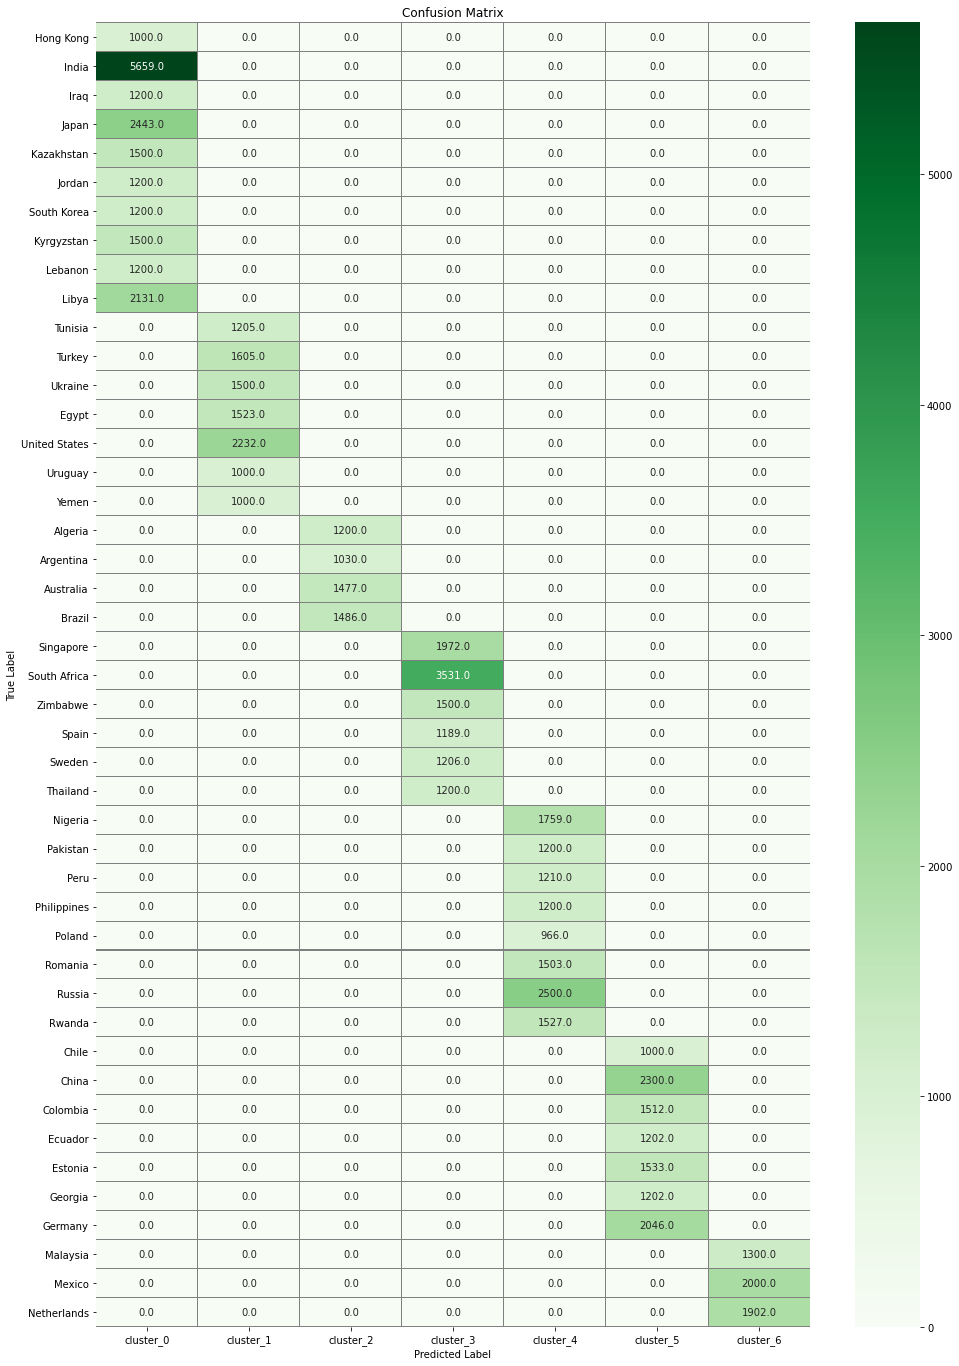

,cluster,country_label,number_of_respondents
,,,count
0,0,344,1000
1,0,356,5659
2,0,368,1200
3,0,392,2443
4,0,398,1500
5,0,400,1200
6,0,410,1200
7,0,417,1500
8,0,422,1200


In [16]:
import seaborn as sns

f,ax = plt.subplots(figsize=(16, 24))
sns.heatmap(conf_mtr, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

result.to_csv("../data_set/cultural_data/clean_data/test_result.csv", index = True)

result

To explain the data, we try to cluster with k = 45 to check if people from the same country cluster together.

<ipython-input-17-f2b451f61c03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["label"] = labels


45


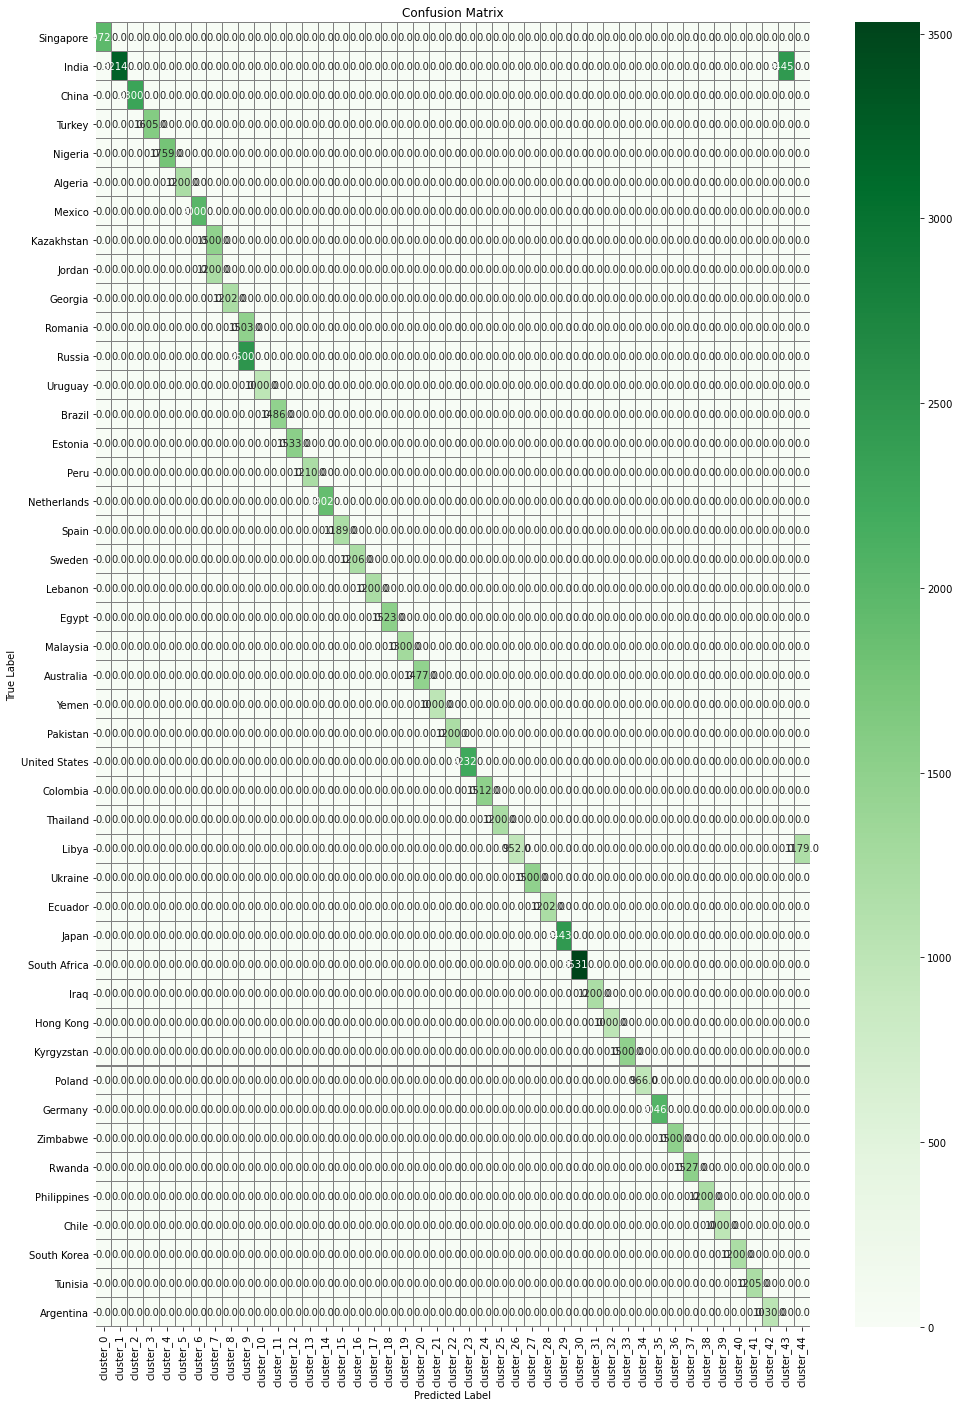

In [17]:
kmeans = KMeans(n_clusters=45)
kmeans.fit(test_data)
labels = kmeans.labels_

test_data["label"] = labels
result = test_data.groupby(["label","V2"]).agg({'V8': ["count"]}).reset_index()
result.rename(columns={"label": "cluster", "V2": "country_label","V8":"number_of_respondents"}, inplace=True)

country = pd.read_csv("../data_set/cultural_data/clean_data/country.csv")

conf_index = [country[country["index"] == x]["name"].iloc[0] for x in result["country_label"]]
conf_index = pd.Series(conf_index).drop_duplicates().tolist()
print(len(conf_index))
conf_mtr = pd.DataFrame(columns=["cluster_"+str(x) for x in range(45)],
                       index=conf_index)

for i in range(conf_mtr.shape[1]):
    col = conf_mtr.columns[i]
    country_label = list(result[result["cluster"]==i]["country_label"])
    country_name_label = [country[country["index"] == x]["name"].iloc[0] for x in country_label]

    respondents = list(result[result["cluster"]==i]["number_of_respondents"]["count"])

    for j in range(len(country_label)):
        conf_mtr[col].loc[country_name_label[j]] = respondents[j]

conf_mtr.fillna(0,inplace=True)

f,ax = plt.subplots(figsize=(16, 24))
sns.heatmap(conf_mtr, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Indeed, we have found out that people in the same country assimilate more to each other than people from other countries. This is more obvious after we select key features using PCA than before when we use all features.